# Projet de Maintenance Prédictive (AI4I 2020 Dataset) - MLOps
# Exploration des données

### Chargement des données

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [33]:
data = pd.read_csv(r"C:\Users\DESKTOP-FM\Desktop\MLOps_project\MLOps_Project\data\raw_data.csv")

In [34]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Exploration de la structure

In [52]:
#La taille des données
data.shape

(10000, 14)

In [54]:
#Types des données
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [56]:
#Le nombre de fois que chaque type de données est présent
pd.value_counts(data.dtypes)

int64      9
float64    3
object     2
dtype: int64

In [57]:
#Synthèse sur les colonnes non numériques
data.describe(exclude="number")

,Product ID,Type
count,10000,10000
unique,10000,3
top,M14860,L
freq,1,6000


In [62]:
#Synthèse sur les colonnes numériques
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


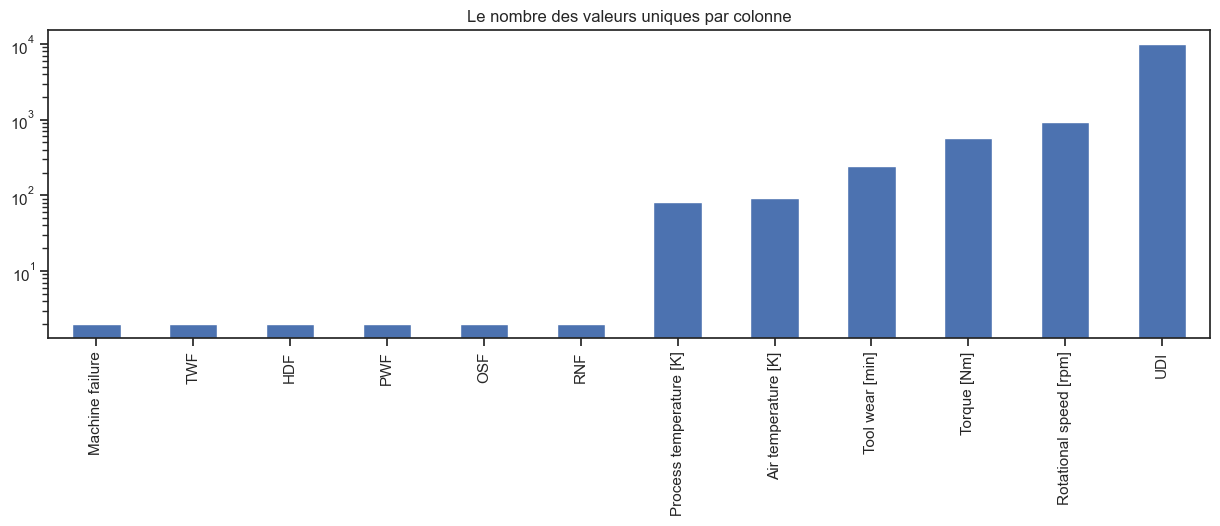

In [64]:
#Insights sur la nature des colonnes numériques (binaire, ordinal, continue etc)
unique_values = data.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Le nombre des valeurs uniques par colonne");

Le graphique ci-dessus montre que nous avons 6 colonnes binaires, tandis que le reste sont des colonnes de valeurs continues, variant dans un intervalle précis.

### Exploration de la qualité

In [67]:
#Le nombre des lignes dupliqués
duplicate_rows = data.duplicated().sum()
print(duplicate_rows)

0


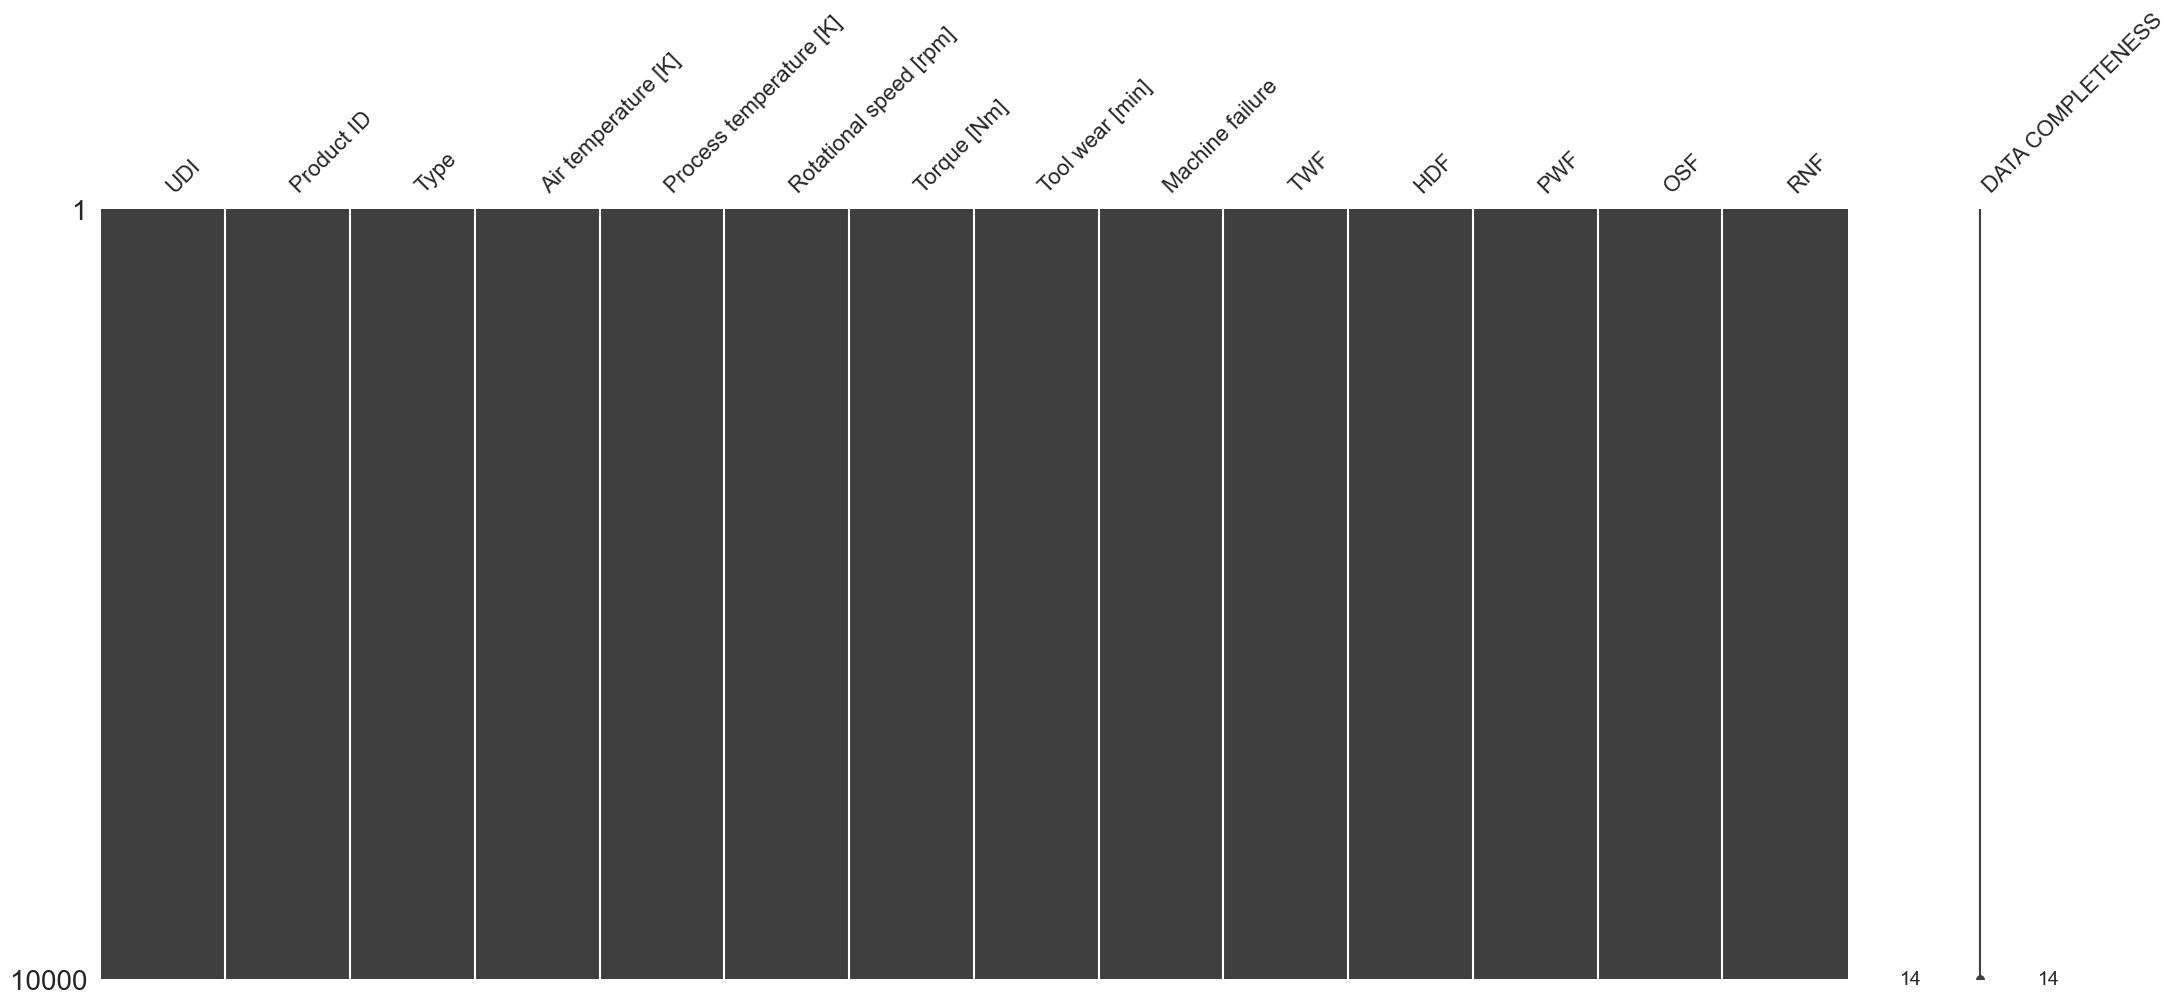

In [69]:
#Les valeurs manquants par echantillon
msno.matrix(data, labels=True, sort="descending");

On remarque qu'il n'y a ni valeurs manquantes ni données dupliquées. Ainsi, notre dataframe témoigne d'une bonne qualité.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

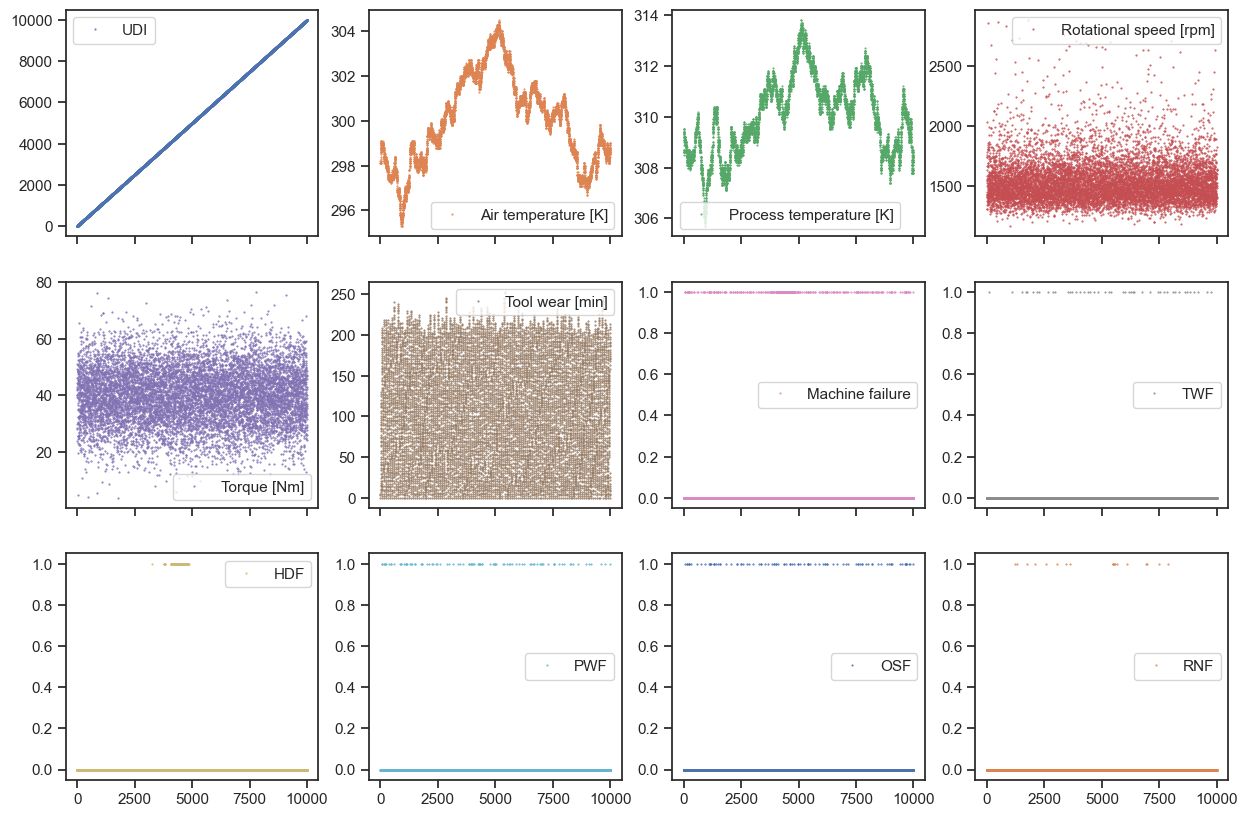

In [80]:
#Détection des anomalies à partir de la distribution des variables
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 10), markersize=1)

Chacune des colonnes suit un comportement différent, mais en général, on peut remarquer une variabilité remarquable. On constate également la présence de valeurs aberrantes, notamment pour les colonnes "Rotational Speed [rpm]" et "Torque [Nm]".

In [87]:
#Détermination du nombre de valeurs aberrantes
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']
for col in columns_to_plot:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Définition des seuils pour les valeurs aberrantes
    seuil_inf = Q1 - 1.5 * IQR
    seuil_sup = Q3 + 1.5 * IQR

    # Sélection des valeurs aberrantes
    valeurs_aberrantes = data[(data[col] < seuil_inf) | (data[col] > seuil_sup)]

    # Affichage du nombre de valeurs aberrantes par colonne
    nombre_valeurs_aberrantes = len(valeurs_aberrantes)
    print(f"Le nombre de valeurs aberrantes dans la colonne '{col}' est : {nombre_valeurs_aberrantes}")


Le nombre de valeurs aberrantes dans la colonne 'Air temperature [K]' est : 0
Le nombre de valeurs aberrantes dans la colonne 'Process temperature [K]' est : 0
Le nombre de valeurs aberrantes dans la colonne 'Rotational speed [rpm]' est : 418
Le nombre de valeurs aberrantes dans la colonne 'Torque [Nm]' est : 69
Le nombre de valeurs aberrantes dans la colonne 'Tool wear [min]' est : 0


### Exploration des colonnes

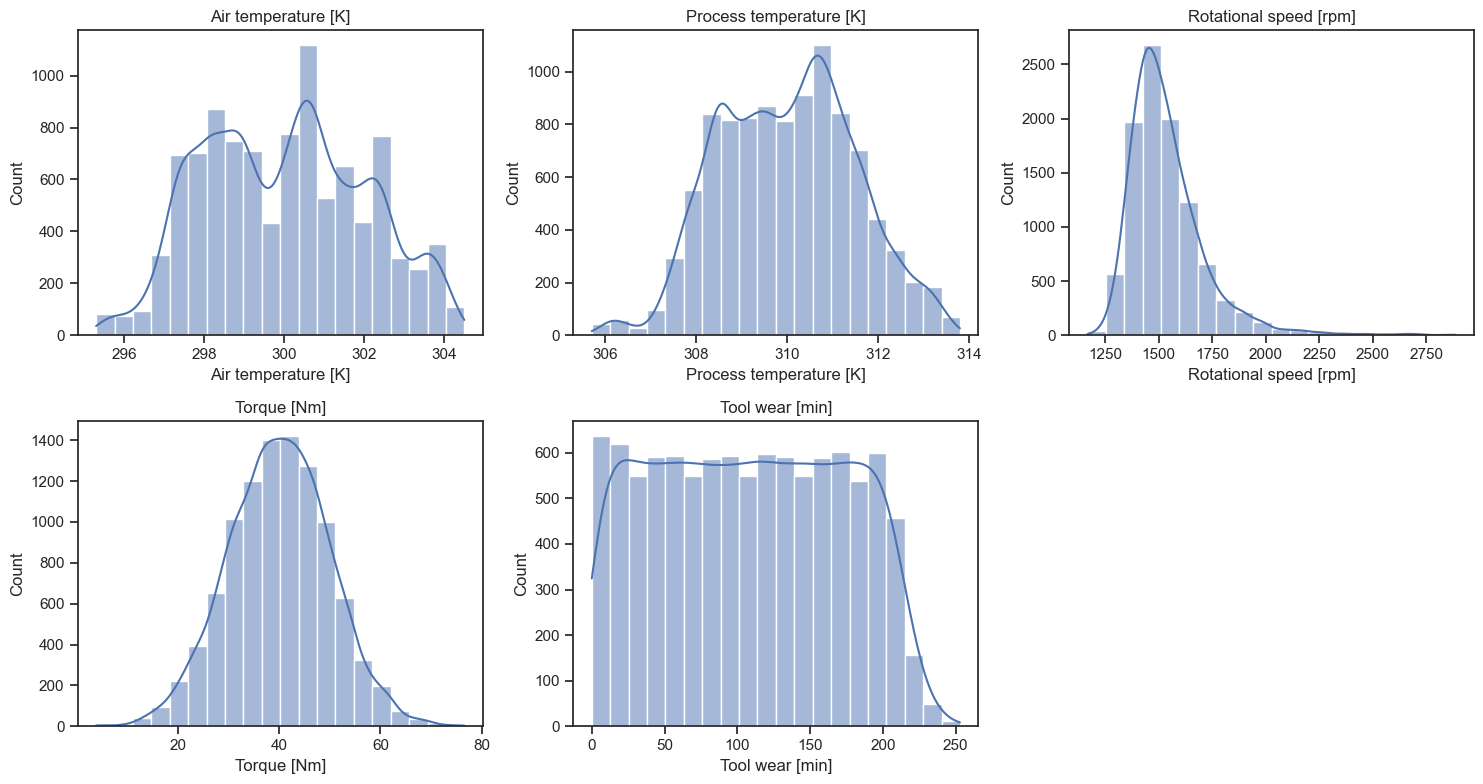

In [82]:
#Découverte des distributions à partir des histogrammes

plt.figure(figsize=(15, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=20, alpha=0.5, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

À travers ces graphiques, on remarque que :
- La colonne "Rotational speed [rpm]" suit une distribution skewed à droite, où la majorité des moteurs ont une vitesse de rotation dans un intervalle restreint variant entre 1100 et 2000 tours par minute.
- La colonne "Tool Wear [min]" suit une distribution uniforme symétrique, indiquant que toutes les machines dans notre base de données ont une durée d'usure similaire.
- La colonne "Torque" suit une distribution normale, ce qui est la distribution idéale pour une variable que l'on utilisera pour l'entraînement.
- Les colonnes "Process temperature [K]" et "Air temperature [K]" suivent une distribution multimodale, présentant plusieurs pics, ce qui rend notre ensemble de données hétérogène.

Les colonnes suivent des distributions qui ne sont pas normales. Avant de procéder à l'implémentation de notre modèle, il est nécessaire d'effectuer des transformations pour ajuster la distribution. Il est également crucial de choisir un modèle de machine learning qui n'assume pas initialement que les colonnes sont distribuées normalement.

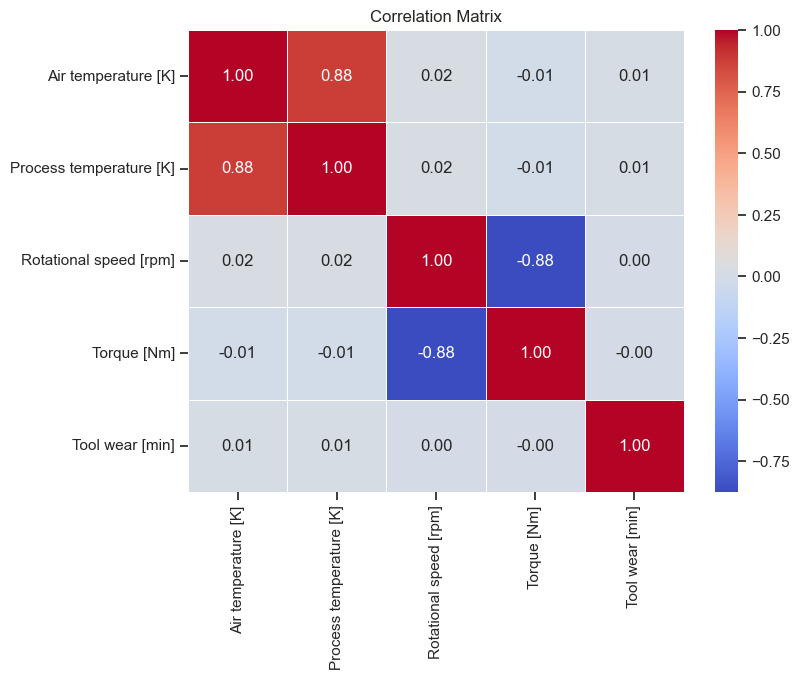

In [84]:
# Relation entre les colonnes - Corrélaton -
df_cor = data.loc[:, columns_to_plot]
correlation_matrix = df_cor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

On remarque qu'il y a une forte corrélation entre "Air temperature [K]" et "Process temperature [K]", ainsi qu'une corrélation tout aussi forte mais négative entre "Torque [Nm]" et "Rotational speed [rpm]". Cette observation pourrait nous inciter à choisir entre les variables corrélées afin d'éviter la colinéarité et d'optimiser le processus de classification.

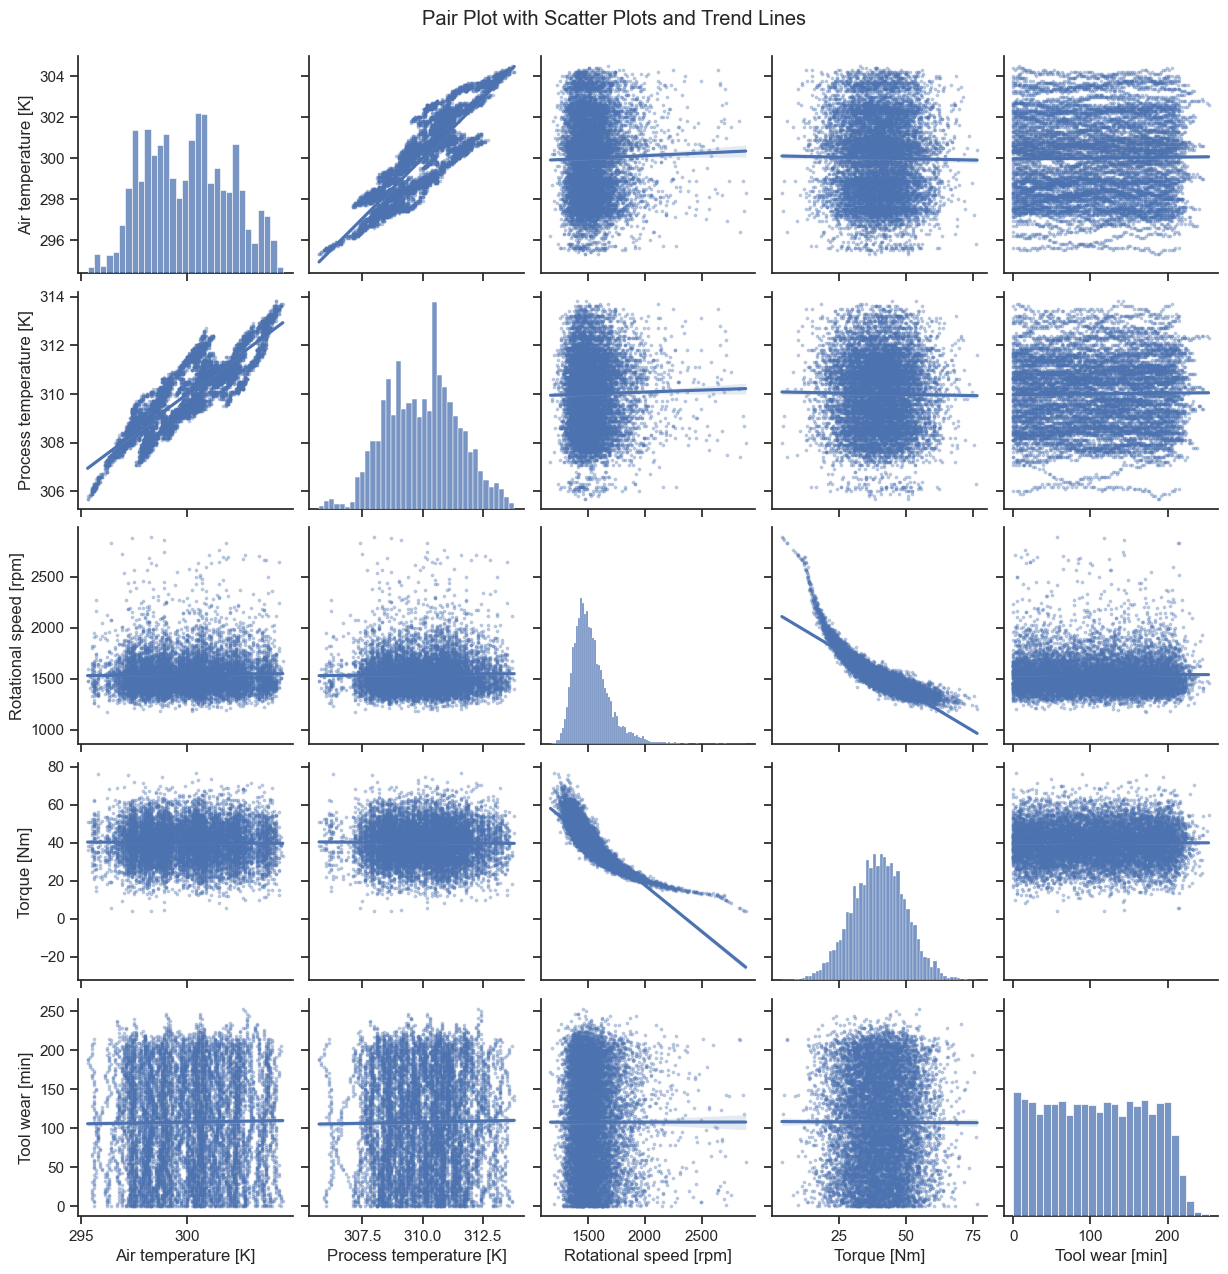

In [86]:
# Relation entre les colonnes - Visualisation de la Corrélaton -
sns.set(style="ticks")
sns.pairplot(data, vars=columns_to_plot, kind='reg', plot_kws={'scatter_kws': {'s': 3, 'alpha': 0.3}})
plt.suptitle('Pair Plot with Scatter Plots and Trend Lines', y=1.02)
plt.show()

Cette visualisation valide le résultat obtenu lors de l'analyse de la heatmap de corrélation.

### Étude de l'équilibre entre les classes

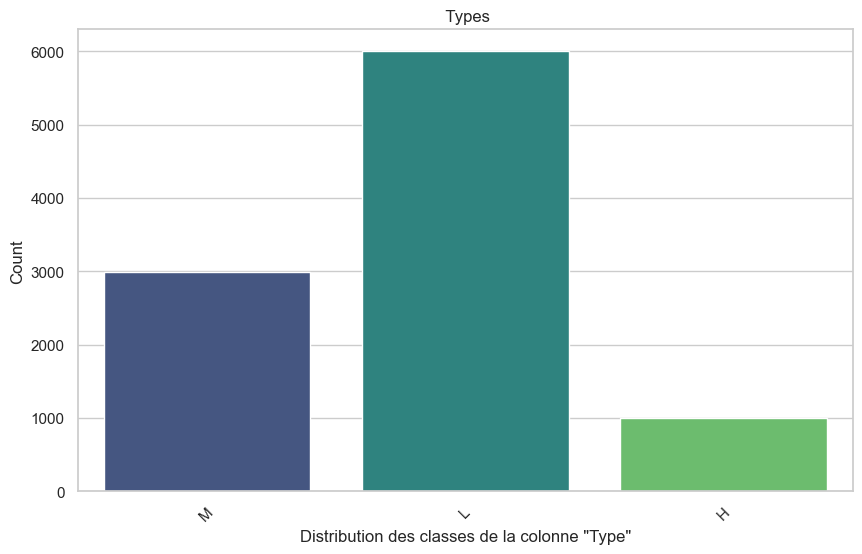

In [91]:
#Étude de l'équilibre entre les classes de la colonne "Type"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data, palette='viridis')
plt.title(' Types')
plt.xlabel('Distribution des classes de la colonne "Type"')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Les classes de la colonne "Type" sont déséquilibrées, ce qui peut avoir une influence négative sur la qualité de notre modèle.

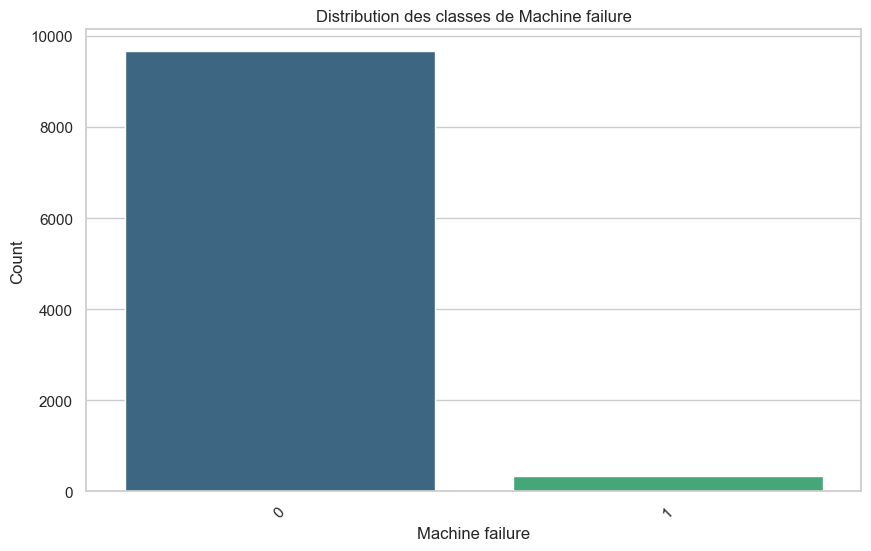

In [93]:
#Étude de l'équilibre entre les classes de variable cible "Machine failure"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Machine failure', data=data, palette='viridis')
plt.title('Distribution des classes de Machine failure')
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Les données présentent un déséquilibre, d'où la nécessité d'opter pour un modèle insensible à cette disparité. Il est également important d'explorer des techniques visant à améliorer la qualité des données, notamment à travers des méthodes de traitement des déséquilibres.

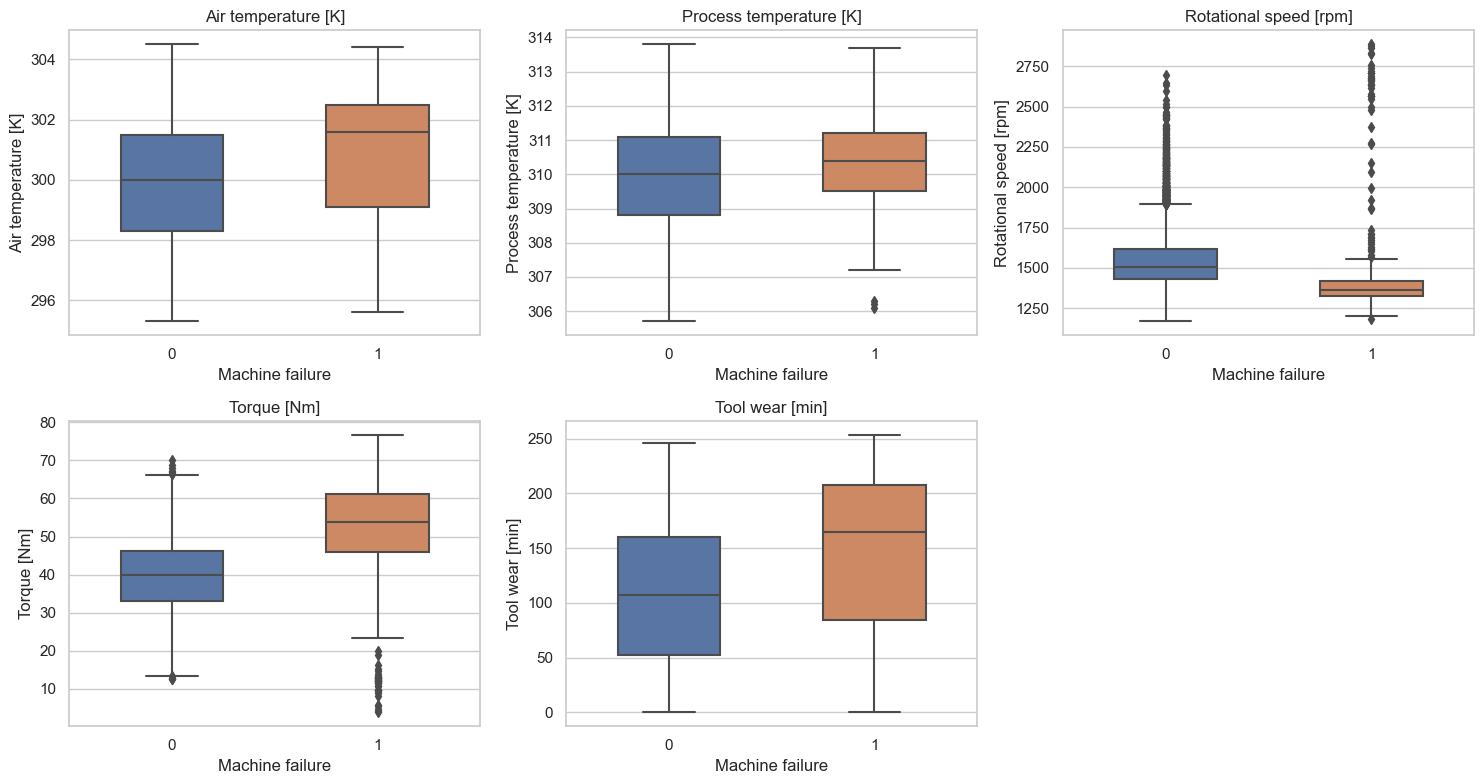

In [94]:
#Distribution des données dans chaque classe de la variable cible
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Machine failure', y=column, data=data, width=0.5)
    plt.title(column)
plt.tight_layout()
plt.show()

Cette visualisation permet de mettre en évidence les différences croissantes entre les deux classes. On remarque que la classe 1 présente plus de valeurs aberrantes, et la majorité des valeurs qu'elle contient sont de grande amplitude, comme indiqué par la position médiane de cette classe par rapport à la classe 0. Ces analyses n'empêchent pas la nécessité de rechercher constamment l'équilibre entre les classes pour obtenir de meilleures performances du modèle.